# Logic and Loops

This lesson covers:

* Mixing logic and loops 

In [1]:
# Setup: Load the momentum data

import pandas as pd

momentum = pd.read_csv("data/momentum.csv", index_col="date", parse_dates=True)

mom_01 = momentum.mom_01
print(momentum.head())

            mom_01  mom_02  mom_03  mom_04  mom_05  mom_06  mom_07  mom_08  \
date                                                                         
2016-01-04    0.67   -0.03   -0.93   -1.11   -1.47   -1.66   -1.40   -2.08   
2016-01-05   -0.36    0.20   -0.37    0.28    0.16    0.18   -0.22    0.25   
2016-01-06   -4.97   -2.33   -2.60   -1.16   -1.70   -1.45   -1.15   -1.46   
2016-01-07   -4.91   -1.91   -3.03   -1.87   -2.31   -2.30   -2.70   -2.31   
2016-01-08   -0.40   -1.26   -0.98   -1.26   -1.13   -1.02   -0.96   -1.42   

            mom_09  mom_10  
date                        
2016-01-04   -1.71   -2.67  
2016-01-05    0.29    0.13  
2016-01-06   -1.14   -0.45  
2016-01-07   -2.36   -2.66  
2016-01-08   -0.94   -1.32  


## Problem: Logical Statements and for Loops
Use a for loop along with an `if` statement to simulate an asymmetric random
walk of the form 

$$y_{i}=y_{i-1}+e_{i}+I_{[e_{i}<0]}e_{i}$$

where $I_{[e_{i}<0]}$ is known as an indicator variable that takes the value
1 if the statement in brackets is true. Plot y. $e$ is a standard normal
shock. Use `cumsum` to simulate a symmetric one (`z`), and plot the two using
the code in the cell below.
 

In [2]:
import numpy as np

e = np.random.standard_normal(100)
y = np.zeros(100)
y[0] = e[0]
for i in range(1, 100):
    y[i] = y[i - 1]
    if e[i] < 0:
        y[i] += 2 * e[i]
    else:
        y[i] += e[i]
z = np.cumsum(e)

Plot the two random walks using the code.  We will cover data visualization
in a later lesson. 

```python
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])
```

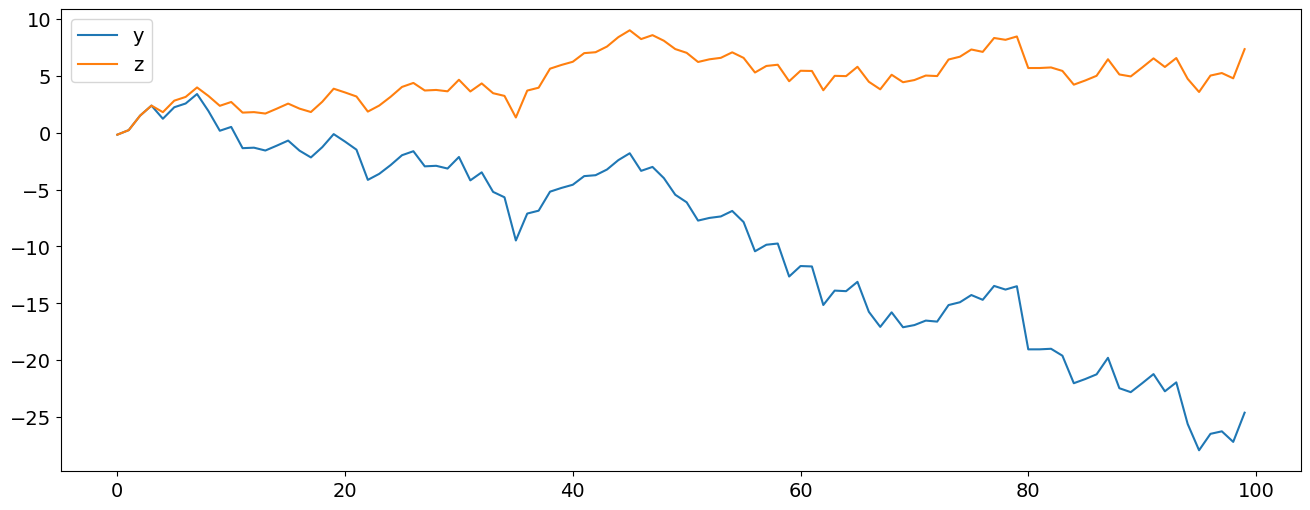

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improve figure size
plt.rc("font", size=14)  # Improve figure size

plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])

## Problem: Simulate the asymmetric random walk without an `if`-`then`

Use boolean multiplication to simulate the same random walk without using
an `if`-`then` statement. 

In [4]:
y = np.zeros(100)
y[0] = e[0]
for i in range(1, 100):
    y[i] = y[i - 1] + e[i] + e[i] * (e[i] < 0)
z = np.cumsum(e)

In [5]:
# Setup: Plot the data
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improve figure size
plt.rc("font", size=14)  # Improve figure size

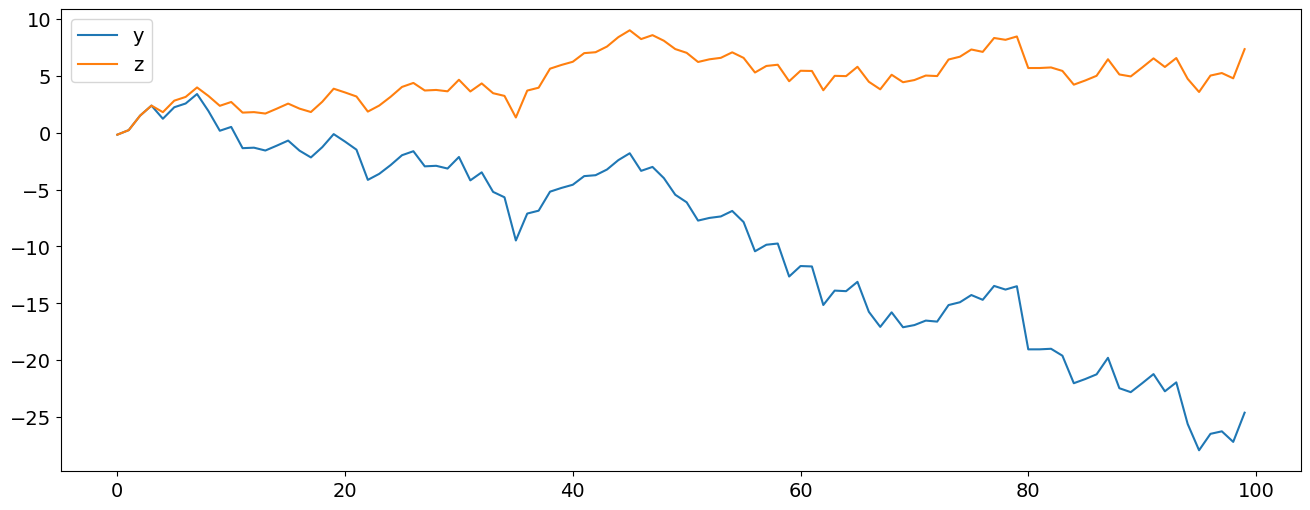

In [6]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])

## Problem: Combining flow control
For momentum portfolios 1 and 10, compute the length of the runs in the
series. In pseudo code,

* Start at i=1 and define run(1) = 1
* For i in 2,...,T, define run(i) = run(i-1) + 1 if 
  $\textrm{sgn}\left(r_{i}\right)=\textrm{sgn}\left(r_{i-1}\right)$ else 1.

You will need to use `len` and `zeros`. 

1. Compute the length longest run in the series and the index of the
   location of the longest run. Was it positive or negative?
2. How many distinct runs lasted 5 or more days?

In [7]:
n = len(mom_01)
run = np.zeros(n)
# or np.zeros_like(mom_01)
# or np.zeros(mom_01.shape)
run[0] = 1
for i in range(n):
    if np.sign(mom_01[i]) == np.sign(mom_01[i - 1]):
        run[i] = run[i - 1] + 1
    else:
        run[i] = 1
max_run = run.max()
print(max_run)
# Happened twice
np.where(run == max_run)

9.0


C:\Users\kevin\AppData\Local\Temp\ipykernel_73736\1845257062.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.sign(mom_01[i]) == np.sign(mom_01[i - 1]):


(array([ 43, 212]),)

Plot the runs using 

```python
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(run)
```

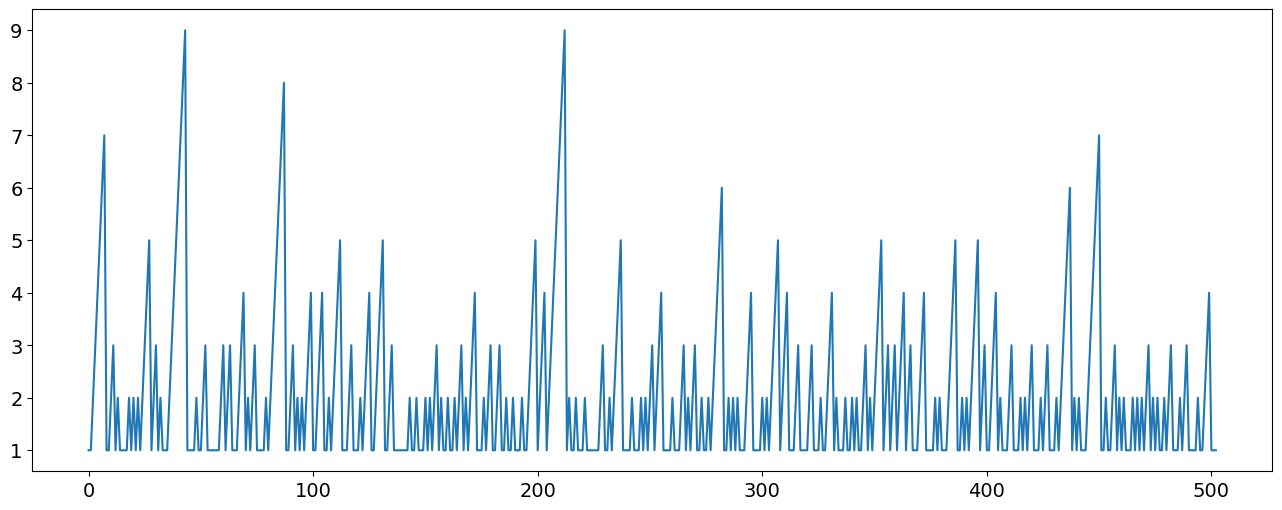

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improve figure size
plt.rc("font", size=14)  # Improve figure size

plt.plot(run)

## Exercises

### Exercise: Simulate a Process with Heteroskedasticity

Simulate 100 observations of a time series with heteroskedasticity 
that follows a random walk of the form: 

$$ y_t = y_{t-1} + \sigma_t \epsilon_t $$

where $\epsilon_t\sim N(0,1)$, $y_0=0$ and $\sigma_t$ is:

* 0.5 if the 0 of the past 3 shocks are negative
* 1 if 1 of the past 3 shocks are negative
* 2 if 2 of the past 3 shocks are negative
* 6 if 3 of the past 3 shocks are negative

Plot the result.

**Notes**

* When generating the first 3 values, treat $\epsilon_{-1}$, $\epsilon_{-2}$ and
  $\epsilon_{-3}$ as 0 (non-negative).
* Re-run the simulation to see different paths.
 

In [9]:
y = np.zeros(100)
e = np.random.standard_normal(100)
y[0] = 0.5 * e[0]
if e[0] < 0:
    sigma = 1
else:
    sigma = 0.5
y[1] = y[0] + sigma * e[1]
if (e[:2] < 0).sum() == 2:
    sigma = 2
elif (e[:2] < 0).sum() == 1:
    sigma = 1
else:
    sigma = 0.5
y[2] = y[1] + sigma * e[2]

for i in range(3, 100):
    neg_shock = e[i - 3 : i] < 0
    neg_count = neg_shock.sum()
    if neg_count == 3:
        sigma = 6
    elif neg_count == 2:
        sigma = 2
    elif neg_count == 1:
        sigma = 1
    else:
        sigma = 0.5
    y[i] = y[i - 1] + sigma * e[i]

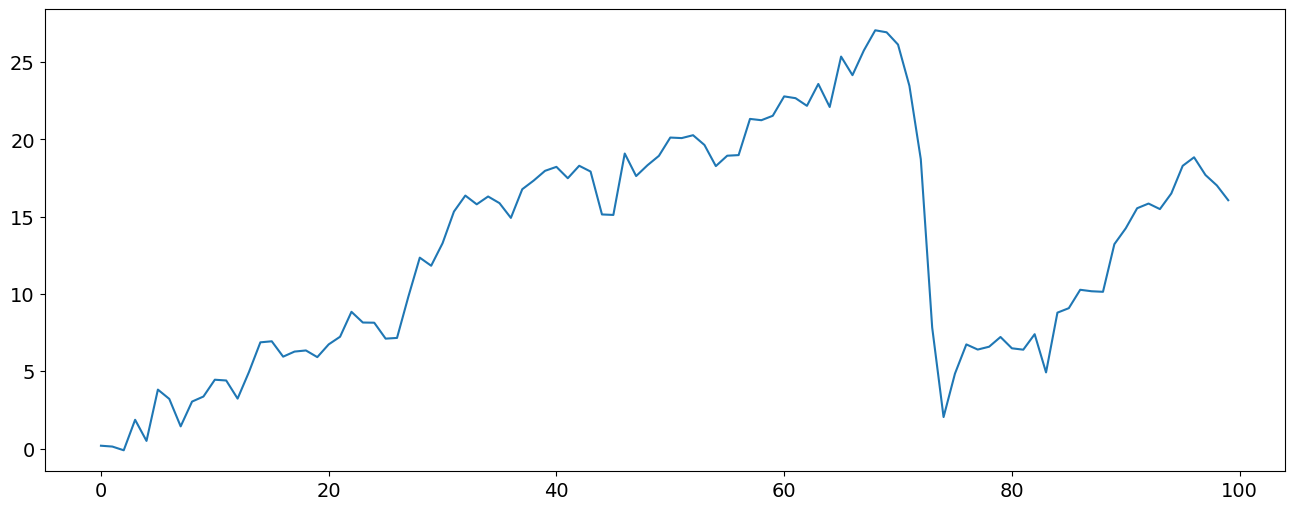

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improve figure size
plt.rc("font", size=14)  # Improve figure size

plt.plot(y)